In [1]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#2 Importing the dataset
dataset = pd.read_csv('/content/Position_Salaries.csv')


In [3]:
dataset.head(100)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)


In [7]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be linear,polynomial or gaussian.
#SVR. We have a non-linear condition so we can select polynomial or gaussian but here
#we select RBF(a gaussian type) kernel. 
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [9]:
#5 Predicting a new result
y_pred=regressor.predict(sc_X.transform([[6.5]]))

y_pred

array([-0.27861589])

In [10]:
sc_y.inverse_transform([y_pred,])

array([[170370.0204065]])

In [11]:
#5 Predicting a new result
y_pred_sc=regressor.predict(sc_X.transform([[6.5]]))
y_pred=sc_y.inverse_transform([y_pred_sc,])
y_pred

array([[170370.0204065]])

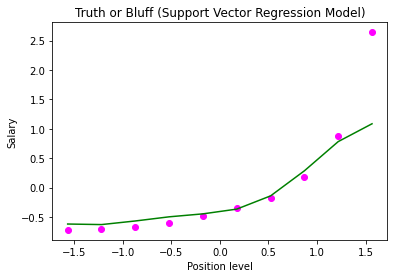

In [12]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


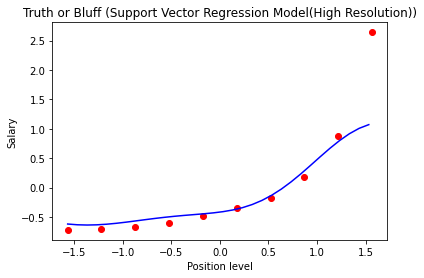

In [13]:
#6 Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression Model(High Resolution))')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
